In [3]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\G Manjunatha
[nltk_data]     Reddy\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to C:\Users\G Manjunatha
[nltk_data]     Reddy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score


In [12]:
df=pd.read_csv("Reviews.csv")
df['Review'].dropna(inplace=True)

df['Review']=[str(entry) for entry in df["Review"]]
df['Review']= [word_tokenize(entry) for entry in df['Review']]
df2=df[:5000]
tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV
df.head()






,Date,Rating,Review
0,2021-09-30 11:35:20,1.0,"[at, first, time, ignition, on, my, tv, nu7500..."
1,2021-09-30 11:34:00,1.0,"[do, not, let, me, listen, to, the, tv, audio,..."
2,2021-09-30 11:31:31,5.0,[fading]
3,2021-09-30 11:25:54,5.0,"[good, order, on, apps, overlay]"
4,2021-09-30 11:15:05,1.0,"[i, have, a, samsung, ai, washing, machine, bu..."


In [74]:
final_words=[]
for index,entry in enumerate(df2["Review"]):
    final_words2=[]
    wordlemmatizer=WordNetLemmatizer()
    for word,tag in pos_tag(entry):
        
        if word not in stopwords.words('english') and word.isalpha():
            word_Final = wordlemmatizer.lemmatize(word,tag_map[tag[0]])
            
            final_words2.append(word_Final)
    final_words.append(final_words2)
    df2.loc[index,'text_final'] = str(final_words2)



c:\python\python38\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
c:\python\python38\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [85]:
len(final_words)

5000

In [88]:
stri='smart hub, hubv, hubv1, hubv2, smarthub'
stri=stri.split(",")
print(stri)
di={"category_1" : ['uninst','pre instal','rid','reappear','disabl','uninstal','deactiv','de activ','un instal','imposs delet'],
'category_2' : ['memory', 'space', 'mb', 'storag'],
'category_3' : ['nude','bad','fire','rubbish','terribl','garbag','shame','chad','shit','crap','junk','fuck','horribl','wast'],
'category_4' : ['not use','not good','not well','useless','bad','worst','unfortun','unhappi','incompet','fail','danger','wast','forc','poor','complic','glitchi','nonsen'],
'category_5' : ['updat','disappoint','previou','longer','version','latest','renov','recent'],
'category_6' : ['not connect','connect','wifi','disconnect','authent','offlin','network','fix','signal','bluetooth','wi-fi','detect','sync','disco'],
'category_7' : ['tv','channel','volum','remot','control','smart','cast','hulu','mirror'],
'category_8' : ['compat', 'crash', 'support', 'stabl', 'error', 'fail', 'unrespon', 'navig', 'unstabl', 'inabl', 'annoy'],
'category_9' : ['not bad', 'great', 'thank', 'excel', 'conveni', 'good', 'awesom', 'super', 'like', 'nice', 'perfect', 'top', 'love', 'superb', 'better', 'well', 'help', 'pretti', 'ok', 'wow', 'use', 'alright', 'fine', 'best', 'comfort', 'cool', 'bravo', 'enjoy', 'amaz', 'perfectli', 'flawless', 'waw', 'ea', 'genial', 'fantast', 'smooth', 'happi', 'spectacl', 'beauti', 'lucki', 'expect', 'practic', 'easi', 'easier', 'interact', 'flawlessli', 'uniqu', 'simpl', 'magnif', 'intellig', 'legal', 'creativ', 'manag', 'seamlessli', 'satisfi', 'handi', 'wonder'],
'category_10' : ['login', 'log', 'page', 'sign', 'cant enter', 'not enter', 'cannot enter', 'samsung account', 'provision'],
'category_11' : ['hack', 'spywar', 'viru', 'secur', 'lock', 'monitor', 'author', 'access'],
'category_12' : ['suggest', 'plea', 'improv', 'add', 'pleas', 'provid', 'support', 'possibl', 'miss', 'lack'],
'category_13' : ["keyboard","key board","joystick"],
'category_14' : ['bud', 'earbud', 'ear bud', 'earbuds', 'ear buds'],
'category_15' : ["plugin"],
'category_16' : ['livecast', 'live cast', 'you tube', 'youtube'],
'category_17' : ['audio', 'sound', 'audio_output'],
'category_18' : ['mirror'],
'category_19' : ['battery','drain'],
'category_20' : ['slow', 'hang', 'delay', 'overload', 'lag', 'laggi', 'lagg', 'slugg', 'late'],
'category_21' : ['on board', 'onboard', 'add device', 'adding device', 'discover', 'scan'],
'category_22' : ['classic','migratiion'],
'category_23' : ['automation', 'automated', 'scene', 'routine', 'rules', 'smartapp', 'smart app'],
'category_24' : ['crash'],
'category_25' : ['permiss','privac','consent'],
'category_26' : ['bluetooth','BT'],
'category_27' : ['wi-fi','wifi'],
'category_28' : ['device control', 'unable to', 'unable control'],
'category_29' : ['event notification', 'push notification', 'device events', 'critical event'],
'category_30' : ['offlin', 'offline', 'online', 'wrong status', 'status', 'no event', 'disconnect', 'not connect'],
'category_31' : ['on board', ' onboard', ' add device', 'adding device', 'discover', 'discovery', 'scan', 'device setup', 'setup', 'not pair', 'pair ', 'slow', 'provision'],
'category_32' : ['battery', ' drain', ' slow', ' hang', ' delay', 'overload', 'lag', 'laggi', 'lagg', 'slugg', 'late', 'compat', 'crash', 'support', 'stabl', 'error', 'fail', 'unrespon', 'navig', 'unstabl', 'inabl', 'annoy'],
'category_33' : ['vibrate'],
'category_34' : ['smart find', 'st find', 'smartthings find', 'smartthing find', 'tag', 'things find'],
'category_35' : ['ref', 'refrigerator', 'family hub', 'familyhub', 'fridge', 'hub'],
'category_36' : ['smart hub', 'hubv', 'hubv1', 'hubv2', 'smarthub']
}




['smart hub', ' hubv', ' hubv1', ' hubv2', ' smarthub']


In [92]:
found=False
category=['category_']*22
num=[1,10,12,17,18,20,23,24,27,28,3,31,32,34,35,37,4,5,6,7,8,9]
for i in range(22):
    category[i]+=str(num[i])

p=[]
dirr={}
for i in range(len(final_words)):
    f=[]
    for j in final_words[i]:
        for keys in di:
            for ele in di[keys]:
                if j==ele or ele in j:
                    if keys not in category:
                        if keys not in dirr:
                            dirr[keys]=[i]
                        else:
                            dirr[keys].append(i)

                    


            
    
                    



    






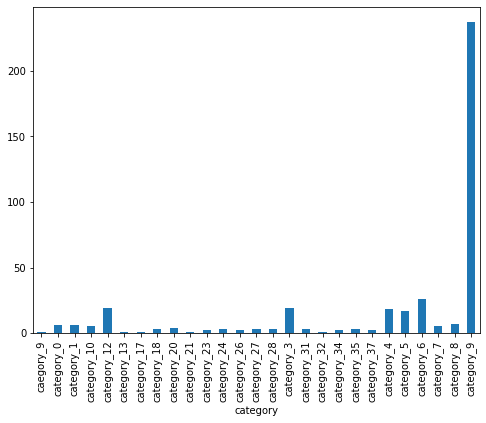

KeyError: "['c' 'd'] not found in axis"

In [33]:
import matplotlib.pyplot as plt
df9=pd.read_csv("400review.csv")
col = ['category', 'Review']
df9=df9[col]
df9.columns = ['category', 'Review']




fig = plt.figure(figsize=(8,6))
df9.groupby('category').Review.count().plot.bar(ylim=0)
plt.show()
df9
df9.drop(['c', 'd'], inplace = True )




['category_9']


In [34]:
stop_words_ = set(stopwords.words('english'))
wn = WordNetLemmatizer()
my_sw = ['make', 'amp',  'news','new' ,'time', 'u','s', 'photos',  'get', 'say']

def black_txt(token):
    return  token not in stop_words_ and token not in list(string.punctuation)  and len(token)>2 and token not in my_sw
  
def clean_txt(text):
    clean_text = []
    clean_text2 = []
    text = re.sub("'", "",text)
    text=re.sub("(\\d|\\W)+"," ",text)    
    clean_text = [ wn.lemmatize(word, pos="v") for word in word_tokenize(text.lower()) if black_txt(word)]
    clean_text2 = [word for word in clean_text if black_txt(word)]
    return " ".join(clean_text2)

In [35]:
def subj_txt(text):
    return  TextBlob(text).sentiment[1]

def polarity_txt(text):
    return TextBlob(text).sentiment[0]

def len_text(text):
    if len(text.split())>0:
         return len(set(clean_txt(text).split()))/ len(text.split())
    else:
         return 0

In [36]:
try:
    import json
    import os
    
    import pandas as  pd
    import spacy
    
    import seaborn as sns
    import string

    from tqdm import tqdm
    from textblob import TextBlob
    
    from nltk.corpus import stopwords
    import nltk
    from nltk.stem import WordNetLemmatizer
    from nltk import word_tokenize
    import re
    
    
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import LabelEncoder
    from sklearn.feature_extraction.text import CountVectorizer
    from sklearn.feature_extraction.text import TfidfTransformer
    from sklearn.naive_bayes import MultinomialNB
    from sklearn.pipeline import Pipeline
    
    
    from sklearn.preprocessing import FunctionTransformer
    from sklearn.base import BaseEstimator, TransformerMixin
    from sklearn.pipeline import FeatureUnion
    from sklearn.feature_extraction import DictVectorizer
    
    import swifter
    
    tqdm.pandas()
except Exception as e:
    print("Error : {} ".format(e))
    
for i in range(400):
    if df9['category'][i]=='caegory_9':
        df9['category'][i]='category_9'

<AxesSubplot:>

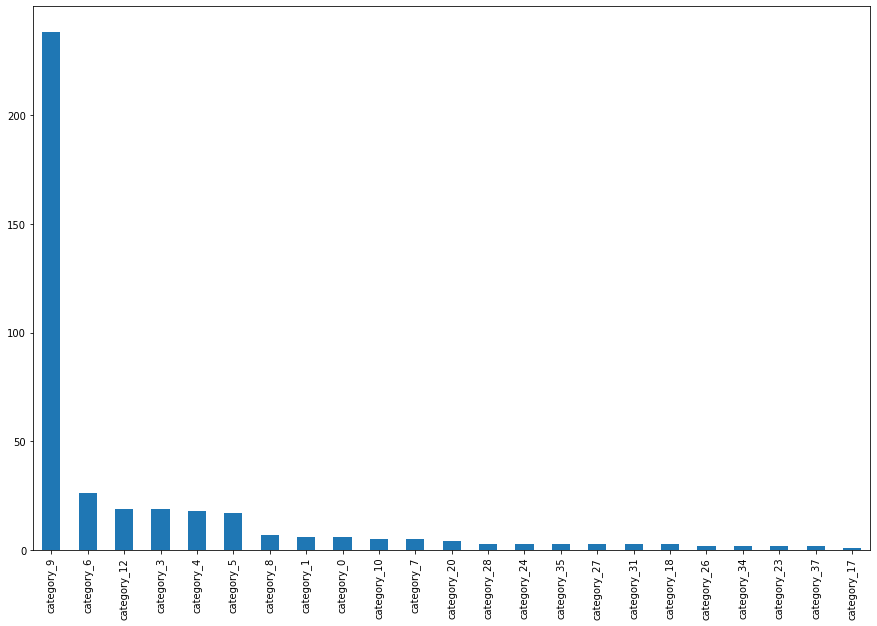

In [37]:

l=['category_21','category_13','category_32','category_17']


df9.drop(40,inplace=True)

df9.drop(270,inplace=True)
df9.drop(337,inplace=True)
# df9.drop()
df9['category'].value_counts().plot( kind='bar', figsize=(15,10))
        


In [38]:


df9['Review'] = df9['Review'].swifter.apply(clean_txt)
df9['polarity'] = df9['Review'].swifter.apply(polarity_txt)
df9['subjectivity'] = df9['Review'].swifter.apply(subj_txt)
df9['len'] = df9['Review'].swifter.apply(lambda x: len(x))
df9


Pandas Apply:   0%|          | 0/397 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/397 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/397 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/397 [00:00<?, ?it/s]

,category,Review,polarity,subjectivity,len
0,category_7,first ignition turn sometimes ignite control c...,0.625000,0.666667,63
1,category_6,let listen audio cell phone app previous one a...,-0.433333,0.416667,71
2,category_5,fade,0.000000,0.000000,4
3,category_9,good order apps overlay,0.700000,0.600000,23
4,category_6,samsung wash machine remotely cant turn absurd...,-0.300000,0.600000,118
...,...,...,...,...,...
395,category_3,key galaxy smarttag directly front somehow stu...,-0.233333,0.800000,85
396,category_9,great experience great app,0.800000,0.750000,26
397,category_6,useless doesnt connect devices although find s...,-0.375000,0.412500,75
398,category_3,bad come problem want solve,-0.700000,0.666667,27


In [39]:
X = df9[['Review', 'polarity', 'subjectivity','len']]
y =df9['category']

encoder = LabelEncoder()
y = encoder.fit_transform(y)

# x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
v = dict(zip(list(y), df9['category'].to_list()))

In [40]:
text_clf = Pipeline([
...     ('vect', CountVectorizer(analyzer="word", stop_words="english")),
...     ('tfidf', TfidfTransformer(use_idf=True)),
...     ('clf', MultinomialNB(alpha=.01)),
... ])

In [41]:
text_clf.fit(X['Review'].to_list(), list(y))

Pipeline(steps=[('vect', CountVectorizer(stop_words='english')),
                ('tfidf', TfidfTransformer()),
                ('clf', MultinomialNB(alpha=0.01))])

In [46]:
rev=pd.read_csv('Reviews.csv')

test_data['Review']=rev['Review'][399:499]
test_out=['category_9',
'category_9',
'category_19',
'category_9',
'category_31',
'category_9',
'category_9',
'category_9',
'category_7',
'category_24',
'category_4',
'category_6',
'category_9',
'category_30',
'category_9',
'category_9',
'category_9',
'category_9',
'category_6',
'category_31',
'category_34',
'category_9',
'category_9',
'category_9',
'category_9',
'category_9',
'category_10',
'category_30',
'category_9',
'category_5',
'category_4',
'category_9',
'category_3',
'category_9',
'category_9',
'category_9',
'category_6',
'category_9',
'category_9',
'category_11',
'category_6',
'category_9',
'category_6',
'category_9',
'category_5',
'category_9',
'category_9',
'category_9',
'category_9',
'category_4',
'category_6',
'category_12',
'category_9',
'category_31',
'category_1',
'category_5',
'category_9',
'category_18',
'category_5',
'category_9',
'category_9',
'category_9',
'category_31',
'category_9',
'category_9',
'category_9',
'category_9',
'category_9',
'category_4',
'category_30',
'category_9',
'category_9',
'category_9',
'category_4',
'category_9',
'category_9',
'category_6',
'category_9',
'category_9',
'category_9',
'category_9',
'category_9',
'category_9',
'category_9',
'category_9',
'category_9',
'category_31',
'category_9',
'category_9',
'category_9',
'category_9',
'category_9',
'category_32',
'category_9',
'category_9',
'category_9',
'category_5',
'category_9',
'category_9',
'category_9']
test_data['Review']=test_data['Review'].swifter.apply(clean_txt)



Pandas Apply:   0%|          | 0/100 [00:00<?, ?it/s]

In [55]:
X_TEST = test_data['Review'].to_list()
Y_TEST = test_out
predicted = text_clf.predict(X_TEST)

c = 0
count=0

for doc, category,out in zip(X_TEST, predicted,Y_TEST):
    
       
        
        print("-"*55)
        print(doc)
        print(v[category])
        print(out)
        
        print("-"*55)
        
        
    



-------------------------------------------------------
like
category_9
category_9
-------------------------------------------------------
-------------------------------------------------------
lovely app convenient
category_9
category_9
-------------------------------------------------------
-------------------------------------------------------
even nothing drain battery
category_12
category_19
-------------------------------------------------------
-------------------------------------------------------
niice
category_9
category_9
-------------------------------------------------------
-------------------------------------------------------
cant add vacum cleaner error support
category_6
category_31
-------------------------------------------------------
-------------------------------------------------------
nice replacement remote control
category_9
category_9
-------------------------------------------------------
-------------------------------------------------------
nice app